<a href="https://colab.research.google.com/github/irisnoww/A-B-test/blob/main/Bayesian_Machine_Learning_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Frequentist statistics

https://medium.com/bluekiri/the-role-of-the-t-student-distribution-29259010d0fe

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ab_testing/advertisement_clicks.csv'
ad_csv = pd.read_csv(url)

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
N = 10
a = np.random.randn(N)+ 2
b = np.random.randn(N)

#without using built-in function
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
#stdpool
s = np.sqrt((var_a + var_b)/2)
t = (a.mean()-b.mean())/(s * np.sqrt(2.0/N))
#degree of freedom
df = 2*N -1
p = 1-stats.t.cdf(t,df = df)
print("t:\t",t, "p:\t", 2*p)
#using scipy built-in function
#Calculate the T-test for the means of *two independent* samples of scores.
# This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by defau
t2,p2 = stats.ttest_ind(a,b)
print("t2:\t",t2, "p2:\t", p2)

t:	 3.9756209480723874 p:	 0.0008100711524867688
t2:	 3.9756209480723874 p2:	 0.0008866947624398666


In [ ]:
#t-test
ad_csv.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [ ]:
ad_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   advertisement_id  2000 non-null   object
 1   action            2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
ad_csv[ad_csv['advertisement_id']=='B'].count()

advertisement_id    1000
action              1000
dtype: int64

Check how many distinct advertisements; there are
2: A B
Not using Bonferroni Correction as there are enough data N

In [ ]:
#Check how many distinct advertisements there are
# 2: A B
ad_csv['advertisement_id'].nunique()

2

Perform the t-test to determine if one advertisement is better than another (in a statistically significant sense)


In [ ]:
#perform the t-test
ad_a = ad_csv[ad_csv['advertisement_id']=='A']
ad_b = ad_csv[ad_csv['advertisement_id']=='B']


In [ ]:
ad_a = ad_a['action']
ad_b = ad_b['action']

In [ ]:
ad_a.mean(), ad_b.mean()

(0.304, 0.372)

In [ ]:
ad_a_click = len(ad_csv[(ad_csv['advertisement_id']=='A')& (ad_csv['action']==1)])
ad_b_click = len(ad_csv[(ad_csv['advertisement_id']=='B')& (ad_csv['action']==1)])

In [ ]:
#for each ad, the ctp is 0.5
ad_a_ctp = ad_a_click/ad_a
ad_b_ctp = ad_b_click/ad_b

In [ ]:
ad_a_ctp,ad_b_ctp

(0.304, 0.372)

In [ ]:
t,p  = stats.ttest_ind(ad_a,ad_b)

In [ ]:
t,p

(-3.2211732138019786, 0.0012971905467125246)

In [ ]:
#Welch's test: unequal vairance test
N1 = len(ad_a)
N2 = len(ad_b)

In [ ]:
a_var = ad_a.var()
b_var = ad_b.var()

In [ ]:
t = (ad_a.mean()-ad_b.mean())/np.sqrt(a_var/N1 + b_var/N2)

In [ ]:
nu1 = N1-1
nu2 = N2-1
df = (a_var/N1 + b_var/N2)**2/((a_var*a_var)/(N1*N1*nu1)+(b_var*b_var)/(N2*N2*nu2))
p = (1-stats.t.cdf(np.abs(t),df =df)) *2
print('t:\t',t,'p:\t',p)

t:	 -3.221173213801983 p:	 0.001297241037400143


In [ ]:
#welch's built in
t,p = stats.ttest_ind(ad_a, ad_b, equal_var=False)

In [ ]:
t,p

(-3.2211732138019786, 0.0012972410374001632)

Chi-Square test statistic
- chi square distributed
- distribution always positive 
- main paramter = degree of freedom
- 


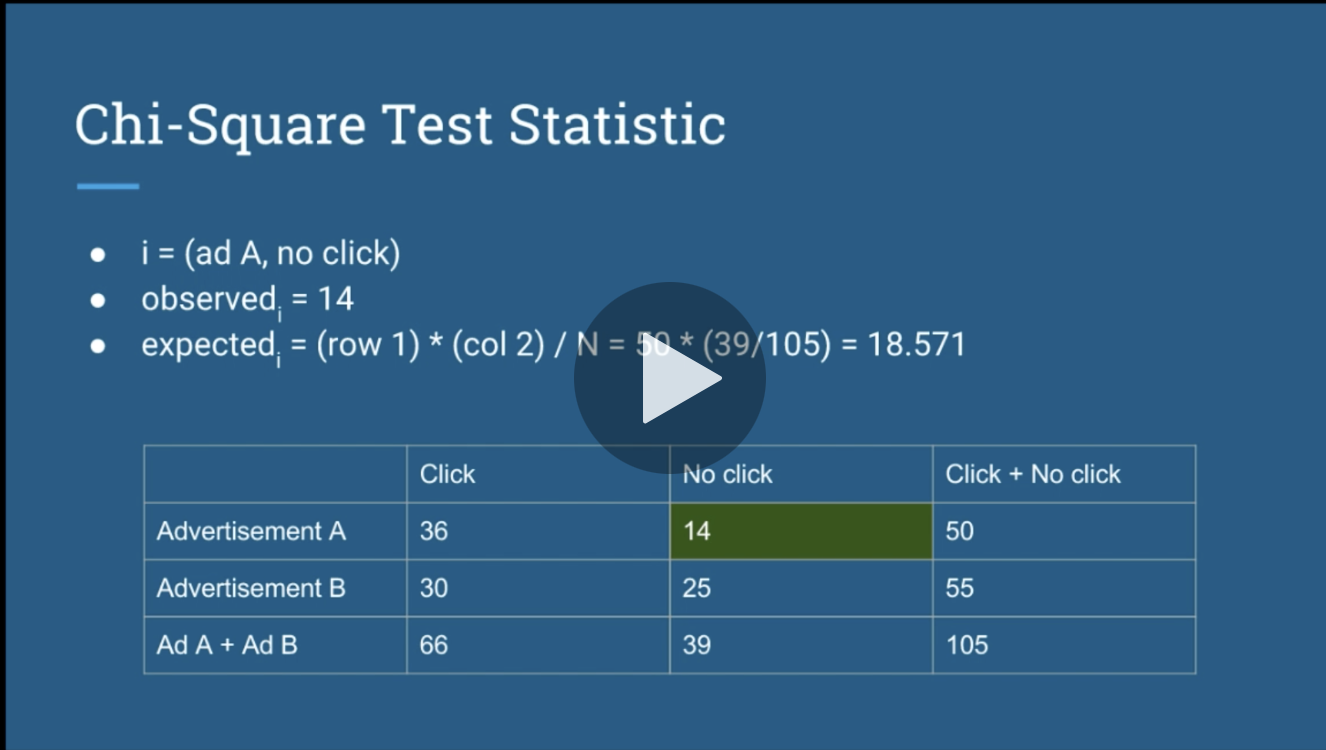

How does p-value change as we collect each sample, does p-value give us definitive answer to our questions

In [ ]:
scipy.stats.chi2_contigency(T, correction = False)
#correction: the test will be more accurracy when N is approaching infinity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [ ]:
class DataGenerator:
  def __init__(self,p1,p2):
    self.p1 = p1
    self.p2 = p2

  def next(self):
    click1 = 1 if (np.random.random()<self.p1) else 0
    click2 = 1 if (np.random.random()<self.p2) else 0
    return click1, click2

def get_p_value(T):
  det = T[0,0]*T[1,1]-T[0,1]*T[1,0]
  c2 = det/T[0].sum() * det/T[1].sum()*T.sum()/T[:,0].sum()/T[:,1].sum()
  p = 1-chi2.cdf(x=c2, df =1)
  return p

def run_experiment(p1,p2,N):
    data = DataGenerator(p1,p2)
    #empty():create a new array of given shape and type, without initializing entries.
    p_values = np.empty(N)
    T = np.zeros((2,2)).astype(np.float32)
    for i in range(N):
      c1, c2 = data.next()
      T[0,c1]+=1
      T[1,c2]+=1
      if i<10:
        p_values[i] =  None
      else:
        p_values[i]=get_p_value(T)
    plt.plot(p_values)
    plt.plot(np.ones(N)*0.05)
    plt.show()
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in float_scalars
  del sys.path[0]


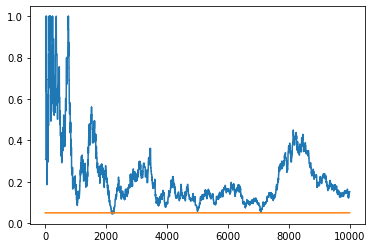

In [ ]:
run_experiment(0.1,0.1,10000)

p-values should be below the line (significant) 5% of time

chisqaure exercise

- "all data is the same"
- "all algorithm interfaces are the same"


In [ ]:
p1 = ad_a.mean()
p2 = ad_b.mean()

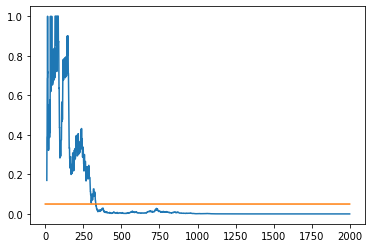

In [ ]:
run_experiment(p1,p2,2000)

In [ ]:
#Chi-square test of independence of variables in a contingency table.
import scipy
from scipy.stats import chi2, chi2_contingency
def get_p_value(T):
  chi, p, dof, expected = scipy.stats.chi2_contingency(T, correction = True)
  return chi, p, dof, expected

# contingency table
#        click       no click
#------------------------------
# ad A |   a            b
# ad B |   c            d

#construct contigency table
ad_a_nc = ad_a.size - ad_a_click
ad_b_nc = ad_b.size - ad_b_click
T = np.array([[ad_a_click, ad_a_nc],[ad_b_click,ad_b_nc]])

result = get_p_value(T)
print(('chi stats ={},  p_value = {},  dof = {}, expected = {}').format(result[0],result[1],result[2],result[3]))

chi stats =10.031015928064498,  p_value = 0.0015392611623486726,  dof = 1, expected = [[338. 662.]
 [338. 662.]]


P_value <= 0.05 --> statistically significance

A/B test on more than 2 groups
Bonferroni Correction
- pairwise testing 
- one vs the rest

post hoc testing

Statistical Power
- Power = sensitivity
- Power = P(reject H0 | H1 = True) --> True Positive 

Definitions:
- High power decreased chances of getting FN
- FN = type 2 error (fail to reject null which is False)
- P(FN) = FN rate = beta
- Power = 1- beta
- FP = type 1 error (incorrectly reject a true null)
- TP, FP, TN, FN

why quantify power:
- 'power analysis' can be used to determine samples size
- effective size: diff between 2 groups; sample size: influence p-value

A/B test pitfalls:
- behavior of p_value can change but shouldnt check until experirence over

p-value:
- 5% of time, we can get a significant p-value, even though a and b are exactly the same

Choosing sample size:
- N = 16 * variance of data /min diff you want to detect


**Summary**

"how can I use this on real data"

- t- test: for comparing 2 different groups of Guassian-distributed data
  - ppl use this test for data that is non- Guassian
  - but there are 'non-parametric' tests that don't make distribution assumption (but less assmption, less power)
  - takeaways: 
    - failing to reject null hypethesis is NOT the same as accepting if; 
    - if there is a diff between A and B, it may mean you didn;t collect enough data for diff to be detected
    - if the variance is larger, you need more data to detect diff ( more data, more power)

`````````````

t- test: 2 tails
chi-square: 1 tail (since all positive)

drawbacks: repeated testing increasing chance of finding significant effect when there is none

if doing repeated tests or testing multiple groups, use Bonferroni correction

``````````````




### Bayesian 

Explore vs. Exploit
- reward id binary
- each machine diff win rate

Epsilon - Grreedy 
- adaptation

UCBI
- estimate mean


Beta distribution


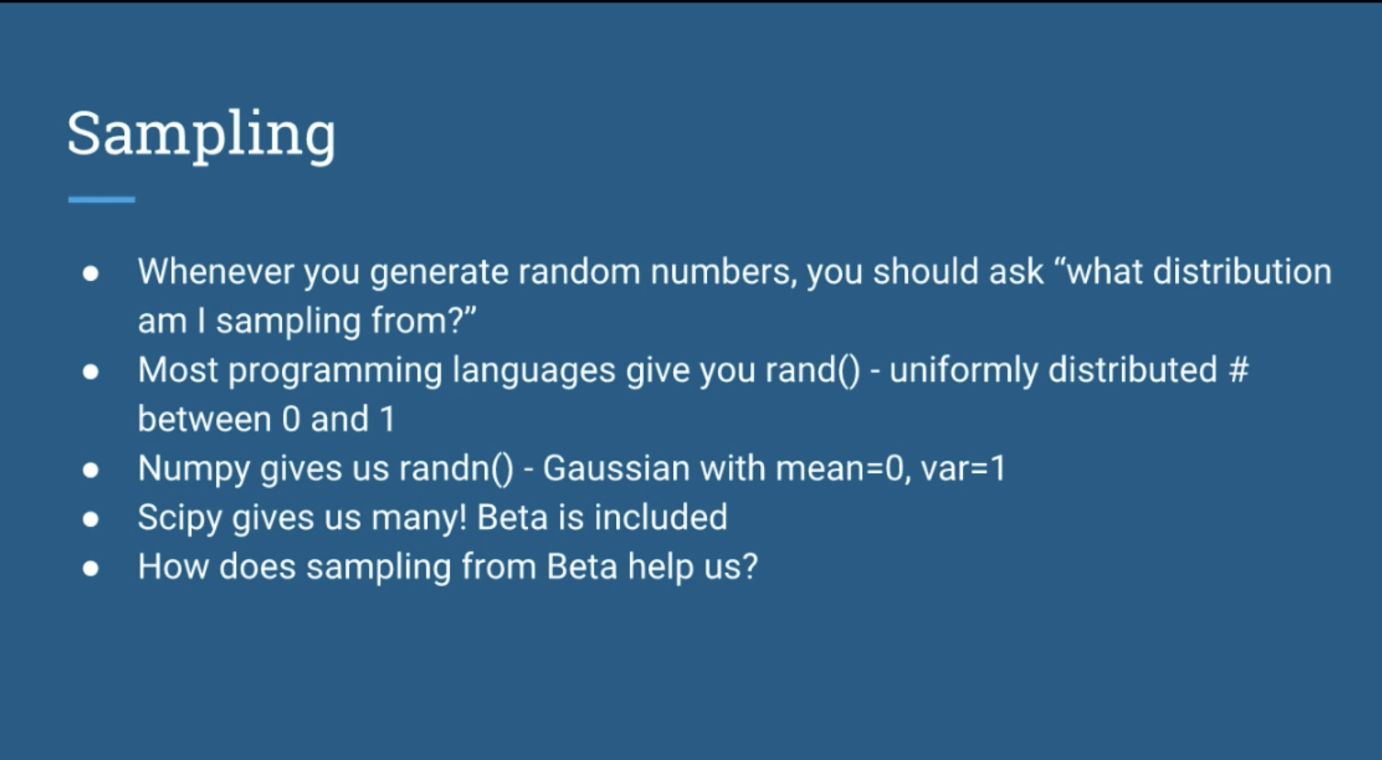

In [ ]:
#bayeian_bandit
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

num_trials = 2000
bandit_prob = [0.2,0.5,0.75]

class bandit(object):
  def __init__(self,p):
    self.p = p
    #prior to be 1 --> uniform distribution
    self.a = 1
    self.b = 1

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self,x):
    #this is the formula derived 
    #x is either 1 or 0
    self.a +=x
    self.b += 1-x

#plot each bandit odf
def plot(bandits,trial):
  #Returns number spaces evenly w.r.t interval. 
  #Similar to arange but instead of step it uses sample number.
  x = np.linspace(0,1,200)
  for b in bandits:
    y = beta.pdf(x,b.a,b.b)
    plt.plot(x,y, label = "real p:%.4f" % b.p)
  plt.title("Bandit distribution after %s trials" % trial)
  plt.legend()
  plt.show()

def experiment():
  bandits = [bandit(p) for p in bandit_prob]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]

  for i in range(num_trials):
    #take a sample from each bandit
    bestb = None
    #keep track maxsample
    maxsample = -1
    allsamples=[]
    #could use argmax instead
    for b in bandits:
      sample = b.sample()
      allsamples.append("%.4f"%sample)
      if sample > maxsample:
        maxsample = sample
        bestb = b
      if i in sample_points:
        print("current samples: %s" % allsamples)
        plot(bandits, i)
      
      x = bestb.pull()
      #update a and b after everytime pulling an arm
      #i.e the posterrior we have now BECOMES the prior when we incorporate more data
      
      bestb.update(x)

if __name__ == "__main__":
  experiment()

  

The online nature of Bayesian Methods
- compare that to traditional machine learning methods fit(xtrain, ytrain) all at once; if we get more data, need retrain from scrach
- with Beta, just add a number to a,add a number to b
- it automatically fine tunes




Finding a thresthold without P-values


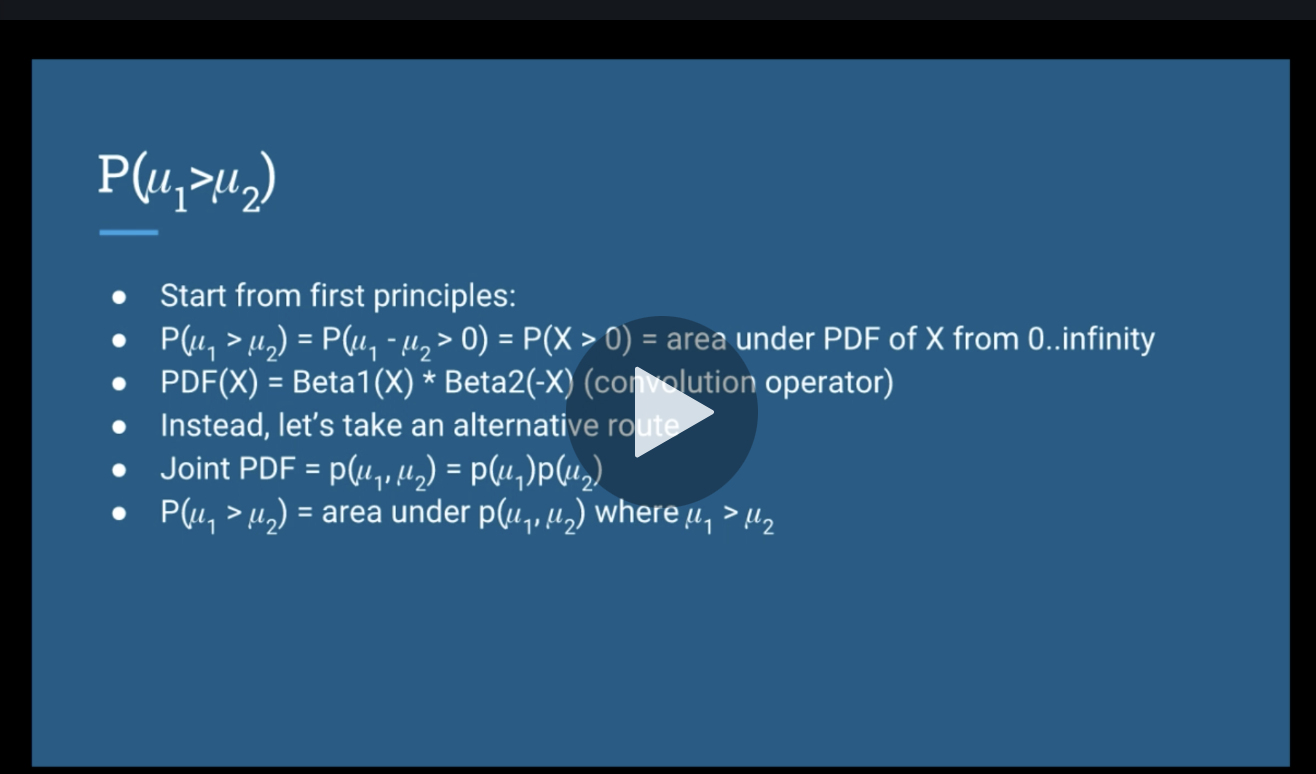

In [ ]:
#thompson sampling
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def run_experiment(p1,p2,p3,N):
  bandits = [bandit(p1),bandit(p2),bandit(p3)]

  data = np.empty(N)

  for i in range(N):
    j = np.argmax([b.sample() for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    data[i] = x
  cumlative_avg_ctr = np.cumsum(data)/(np.arange(N)+1)

    # plot moving average ctr
  plt.plot(cumlative_avg_ctr)
  plt.plot(np.ones(N)*p1)
  plt.plot(np.ones(N)*p2)
  plt.plot(np.ones(N)*p3)
  plt.ylim((0,1))
  plt.xscale('log')
  plt.show()

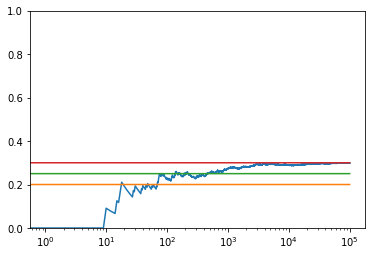

In [ ]:
run_experiment(0.2, 0.25, 0.3, 100000)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


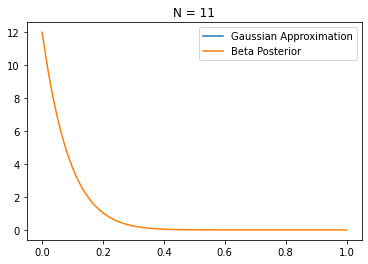

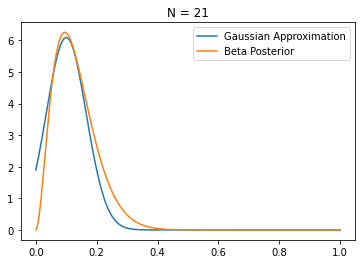

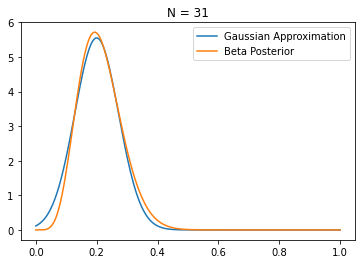

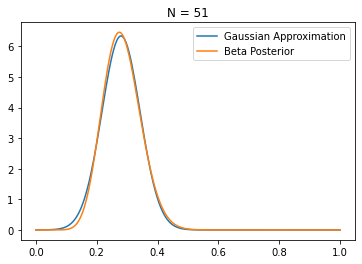

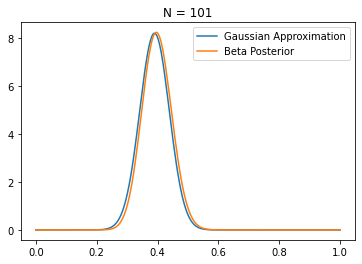

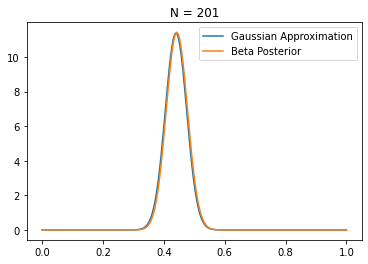

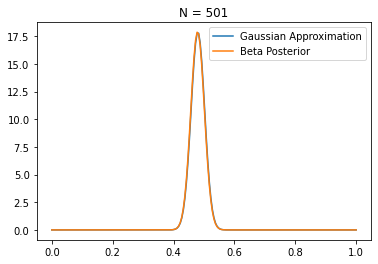

In [ ]:
#CI Comparison

from scipy.stats import beta, norm
#number of coin tosses
T = 501
true_ctr = 0.5
#beta priorrs
a,b = 1,1 
#tuples
plot_indices = (10,20,30,50,100,200,500)
data = np.empty(T)

for i in range(T):
  x = 1 if np.random.random()< true_ctr else 0
  data[i] = x

  #update a and b
  a += x
  b += 1-x

  if i in plot_indices:
    #maximum likelihood estimato of ctr
    p = data[:i].mean()
    n = i + 1
    std = np.sqrt(p*(1-p)/n)

    #gaussian
    x = np.linspace(0,1,200)
    g = norm.pdf(x, loc=p,scale=std)
    plt.plot(x,g, label = 'Gaussian Approximation')

    #beta
    post = beta.pdf(x, a=a, b=b)
    plt.plot(x, post, label='Beta Posterior')
    plt.legend()
    plt.title("N = %s" % n)
    plt.show()

In [ ]:
import numpy as np
from flask import Flask, jsonify, request
from scipy.stats import beta

# create an app
app = Flask(__name__)


# define bandits
# there's no "pull arm" here
# since that's technically now the user/client
class Bandit:
  def __init__(self,name):
    #initialize a and b 
    self.click = 0
    self.view = 0
    self.name = name

  def sample(self):
    #beta(1,1) is the priorr
    a = 1 + self.click
    b = 1 + self.view
    return np.random.beta(a,b)

  # TODO - what else does the Bandit need to do?
  #update a and b
  def update_click(self):
    self.click +=1
  def update_view(self):
    self.view +=1

    if self.view % 50 == 0:
      print("%s:click=%s, view=%s" % (self.name, self.click, self.view))


# initialize bandits
banditA = Bandit('A')
banditB = Bandit('B')



@app.route('/get_ad')
def get_ad():
  if banditA.sample() >  banditB.sample():
    ad = 'A'
    banditA.update_view()
  else:
    ad = B
    banditB.update_view()
  return jsonify({'advertisement_id': 'A'})


@app.route('/click_ad', methods=['POST'])
def click_ad():
  result = 'OK'
  if request.form['advertisement_id'] == 'A':
    banditA.update_click()
    pass
  elif request.form['advertisement_id'] == 'B':
    banditB.update_click()
    pass
  else:
    result = 'Invalid Input.'

  # nothing to return really
  return jsonify({'result': result})


if __name__ == '__main__':
  app.run(host='127.0.0.1', port='8888')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8888/ (Press CTRL+C to quit)


Recap
- classical A/B test and drawbacks
- Bernouli distributed data e.g ctr, conversion rate
- adapt to data collected
- solve explore - exploit


Conjugate Priors
- update posterior parameters in closed-form - usually addition and multiplication


**Die roll**
- categorical likelihood
    - model the likelihood 
    - dirichlet priori 
    - posterior 


**Guassians**
- has 2 paramenters: mean and variance
- 



In [ ]:
#categorical distribution
#